# Your Title Here

**Name(s)**: An-Chi Lu

**Website Link**: (your website link)

In [32]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

In [33]:
path_interactions = Path('food_data') / 'RAW_interactions.csv'
path_recipes = Path('food_data') / 'RAW_recipes.csv'
r_interactions = pd.read_csv(path_interactions)
r_recipes = pd.read_csv(path_recipes)

In [34]:
r_recipes

name      id  minutes  \
0              1 brownies in the world    best ever  333281       40   
1                1 in canada chocolate chip cookies  453467       45   
2                            412 broccoli casserole  306168       40   
3                            millionaire pound cake  286009      120   
4                                     2000 meatloaf  475785       90   
...                                             ...     ...      ...   
83777                                   zydeco soup  486161       60   
83778                              zydeco spice mix  493372        5   
83779                     zydeco ya ya deviled eggs  308080       40   
83780        cookies by design   cookies on a stick  298512       29   
83781  cookies by design   sugar shortbread cookies  298509       20   

       contributor_id   submitted  \
0              985201  2008-10-27   
1             1848091  2011-04-11   
2               50969  2008-05-30   
3              461724  2008-02-12   
4             2202916  2012-03-06   
...               ...         ...   
83777          227978  2012-08-29   
83778         1500678  2013-01-09   
83779           37779  2008-06-07   
83780          506822  2008-04-15   
83781          506822  2008-04-15   

                                                    tags  \
0      ['60-minutes-or-less', 'time-to-make', 'course...   
1      ['60-minutes-or-less', 'time-to-make', 'cuisin...   
2      ['60-minutes-or-less', 'time-to-make', 'course...   
3      ['time-to-make', 'course', 'cuisine', 'prepara...   
4      ['time-to-make', 'course', 'main-ingredient', ...   
...                                                  ...   
83777  ['ham', '60-minutes-or-less', 'time-to-make', ...   
83778  ['15-minutes-or-less', 'time-to-make', 'course...   
83779  ['60-minutes-or-less', 'time-to-make', 'course...   
83780  ['30-minutes-or-less', 'time-to-make', 'course...   
83781  ['30-minutes-or-less', 'time-to-make', 'course...   

                                           nutrition  n_steps  \
0           [138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]       10   
1       [595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]       12   
2          [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   
3      [878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]        7   
4         [267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]       17   
...                                              ...      ...   
83777    [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
83778          [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
83779           [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
83780      [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
83781       [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                   steps  \
0      ['heat the oven to 350f and arrange the rack i...   
1      ['pre-heat oven the 350 degrees f', 'in a mixi...   
2      ['preheat oven to 350 degrees', 'spray a 2 qua...   
3      ['freheat the oven to 300 degrees', 'grease a ...   
4      ['pan fry bacon , and set aside on a paper tow...   
...                                                  ...   
83777  ['heat oil in a 4-quart dutch oven', 'add cele...   
83778        ['mix all ingredients together thoroughly']   
83779  ['in a bowl , combine the mashed yolks and may...   
83780  ['place melted butter in a large mixing bowl a...   
83781  ['whip sugar and shortening in a large bowl , ...   

                                             description  \
0      these are the most; chocolatey, moist, rich, d...   
1      this is the recipe that we use at my school ca...   
2      since there are already 411 recipes for brocco...   
3      why a millionaire pound cake?  because it's su...   
4      ready, set, cook! special edition contest entr...   
...                                                  ...   
83777  this is a delicious soup that i originally fou...   
83778    this spice mix will make 

In [35]:
r_interactions

user_id  recipe_id        date  rating  \
0          1293707      40893  2011-12-21       5   
1           126440      85009  2010-02-27       5   
2            57222      85009  2011-10-01       5   
3           124416     120345  2011-08-06       0   
4       2000192946     120345  2015-05-10       2   
...            ...        ...         ...     ...   
731922  2002357020      82303  2018-12-05       5   
731923      583662     386618  2009-09-29       5   
731924      157126      78003  2008-06-23       5   
731925       53932      78003  2009-01-11       4   
731926  2001868099      78003  2017-12-18       5   

                                                   review  
0       So simple, so delicious! Great for chilly fall...  
1       I made the Mexican topping and took it to bunk...  
2       Made the cheddar bacon topping, adding a sprin...  
3       Just an observation, so I will not rate.  I fo...  
4       This recipe was OVERLY too sweet.  I would sta...  
...                                                   ...  
731922  Delicious quick thick chocolate sauce with ing...  
731923  These were so delicious!  My husband and I tru...  
731924  WOW!  Sometimes I don't take the time to rate ...  
731925  Very good!  I used regular port as well.  The ...  
731926  I am so glad I googled and found this here. Th...  

[731927 rows x 5 columns]

In [36]:
# merge the two datasets and create a column containing the average rating per recipe
raw = r_recipes.merge(r_interactions, left_on = 'id', right_on = 'recipe_id', how = 'left')
raw = raw.replace(0.0, np.nan)
raw

name      id  minutes  \
0               1 brownies in the world    best ever  333281     40.0   
1                 1 in canada chocolate chip cookies  453467     45.0   
2                             412 broccoli casserole  306168     40.0   
3                             412 broccoli casserole  306168     40.0   
4                             412 broccoli casserole  306168     40.0   
...                                              ...     ...      ...   
234424                     zydeco ya ya deviled eggs  308080     40.0   
234425        cookies by design   cookies on a stick  298512     29.0   
234426  cookies by design   sugar shortbread cookies  298509     20.0   
234427  cookies by design   sugar shortbread cookies  298509     20.0   
234428  cookies by design   sugar shortbread cookies  298509     20.0   

        contributor_id   submitted  \
0               985201  2008-10-27   
1              1848091  2011-04-11   
2                50969  2008-05-30   
3                50969  2008-05-30   
4                50969  2008-05-30   
...                ...         ...   
234424           37779  2008-06-07   
234425          506822  2008-04-15   
234426          506822  2008-04-15   
234427          506822  2008-04-15   
234428          506822  2008-04-15   

                                                     tags  \
0       ['60-minutes-or-less', 'time-to-make', 'course...   
1       ['60-minutes-or-less', 'time-to-make', 'cuisin...   
2       ['60-minutes-or-less', 'time-to-make', 'course...   
3       ['60-minutes-or-less', 'time-to-make', 'course...   
4       ['60-minutes-or-less', 'time-to-make', 'course...   
...                                                   ...   
234424  ['60-minutes-or-less', 'time-to-make', 'course...   
234425  ['30-minutes-or-less', 'time-to-make', 'course...   
234426  ['30-minutes-or-less', 'time-to-make', 'course...   
234427  ['30-minutes-or-less', 'time-to-make', 'course...   
234428  ['30-minutes-or-less', 'time-to-make', 'course...   

                                           nutrition  n_steps  \
0           [138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]       10   
1       [595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]       12   
2          [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   
3          [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   
4          [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   
...                                              ...      ...   
234424          [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
234425     [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
234426      [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   
234427      [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   
234428      [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       ['heat the oven to 350f and arrange the rack i...   
1       ['pre-heat oven the 350 degrees f', 'in a mixi...   
2       ['preheat oven to 350 degrees', 'spray a 2 qua...   
3       ['preheat oven to 350 degrees', 'spray a 2 qua...   
4       ['preheat oven to 350 degrees', 'spray a 2 qua...   
...                                                   ...   
234424  ['in a bowl , combine the mashed yolks and may...   
234425  ['place melted butter in a large mixing bowl a...   
234426  ['whip sugar and shortening in a large bowl , ...   
234427  ['whip sugar and shortening in a large bowl , ...   
234428  ['whip sugar and shortening in a large bowl , ...   

                                              description  \
0       these are the most; chocolatey, moist, rich, d...   
1       this is the recipe that we use at my school ca...   
2       since there are already 411 recipes for brocco...   
3       since there are already 411 recipes for brocco...   
4       since there are already 411 recipes for brocco...   
...                                                   ...   
234424                          deviled 

In [69]:
# Find the average rating per recipe, as a Series.
average_rating_recipe = pd.DataFrame(raw.groupby('id')['rating'].mean())
average_rating_recipe
raw_modify = raw.merge(average_rating_recipe, on = 'id', how = 'inner')
raw_modify['n_steps'].max()

np.int64(100)

## Step 2: Data Cleaning and Exploratory Data Analysis

In [78]:
raw_modify = raw_modify['minutes'].fillna(0.0)

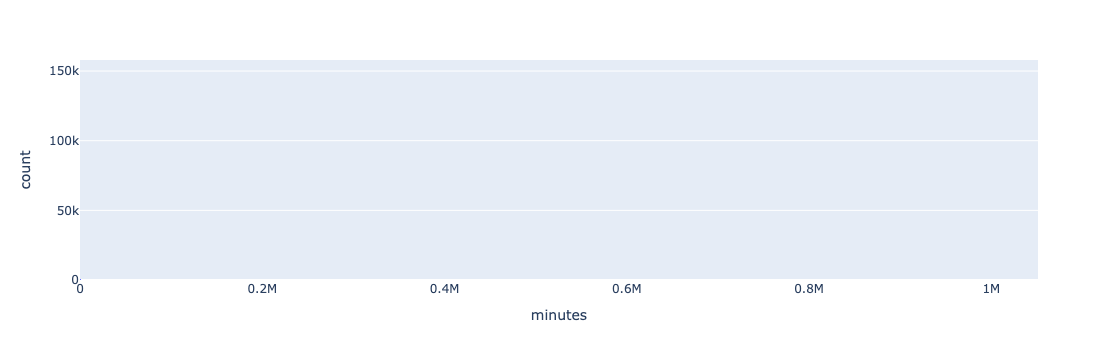

In [79]:
px.histogram(raw_modify, x = 'minutes')

## Step 3: Assessment of Missingness

In [39]:
# TODO

## Step 4: Hypothesis Testing

In [40]:
# TODO

## Step 5: Framing a Prediction Problem

In [41]:
# TODO

## Step 6: Baseline Model

In [42]:
# TODO

## Step 7: Final Model

In [43]:
# TODO

## Step 8: Fairness Analysis

In [44]:
# TODO